In [1]:
# Step 1: Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


In [2]:
# Step 2: Load dataset
df = pd.read_csv("/content/house_prices.csv")

# Display first few rows
print(df.head())


   Area  Bedrooms  Bathrooms  Stories  Parking    Price
0  3974         2          2        1        2  5713621
1  4307         3          1        1        2  5934009
2  1660         4          3        2        1  3399897
3  2094         3          3        2        2  3653824
4  1930         4          1        1        1  3166313


In [4]:
# Step 3: Basic info
print(df.info())



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   Area       100 non-null    int64
 1   Bedrooms   100 non-null    int64
 2   Bathrooms  100 non-null    int64
 3   Stories    100 non-null    int64
 4   Parking    100 non-null    int64
 5   Price      100 non-null    int64
dtypes: int64(6)
memory usage: 4.8 KB
None


In [5]:
# Check for missing values
print(df.isnull().sum())




Area         0
Bedrooms     0
Bathrooms    0
Stories      0
Parking      0
Price        0
dtype: int64


In [6]:
# Summary statistics
print(df.describe())

              Area    Bedrooms   Bathrooms     Stories     Parking  \
count   100.000000  100.000000  100.000000  100.000000  100.000000   
mean   2765.460000    2.550000    2.000000    1.560000    1.020000   
std    1056.773175    1.157976    0.828775    0.498888    0.803779   
min     821.000000    1.000000    1.000000    1.000000    0.000000   
25%    1920.500000    1.000000    1.000000    1.000000    0.000000   
50%    2854.000000    3.000000    2.000000    2.000000    1.000000   
75%    3692.000000    4.000000    3.000000    2.000000    2.000000   
max    4438.000000    4.000000    3.000000    2.000000    2.000000   

              Price  
count  1.000000e+02  
mean   4.288348e+06  
std    1.301564e+06  
min    1.811145e+06  
25%    3.294171e+06  
50%    4.317864e+06  
75%    5.357088e+06  
max    6.766493e+06  


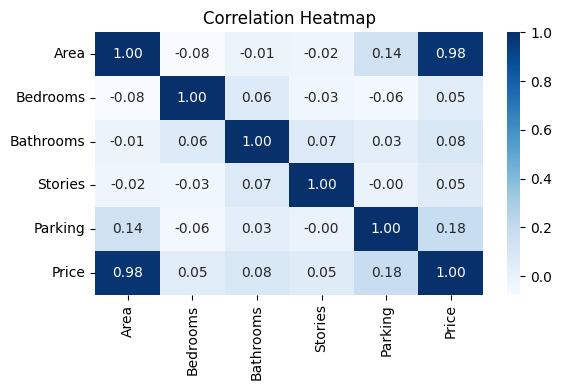

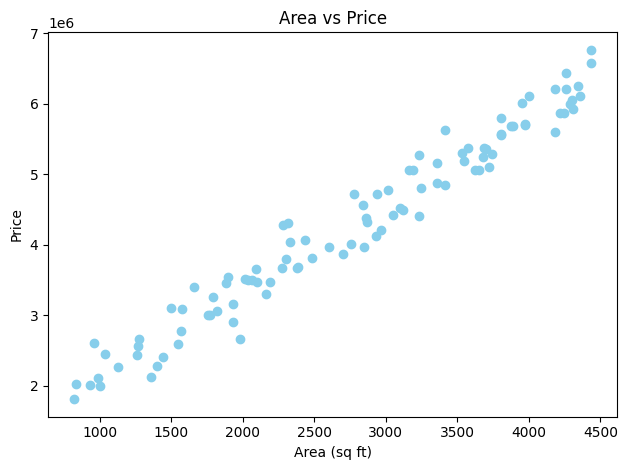

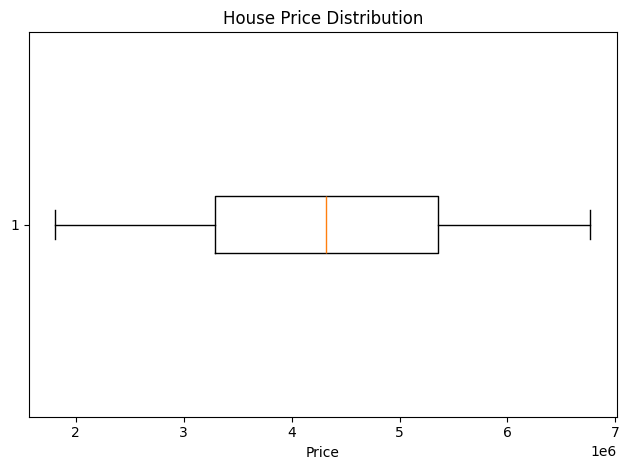

In [15]:
# 1️⃣ Correlation Heatmap (Simple)
plt.figure(figsize=(6,4))
sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap="Blues")
plt.title("Correlation Heatmap")
plt.tight_layout()
plt.show()

# 2️⃣ Scatter Plot: Area vs Price (Simple)
plt.scatter(df['Area'], df['Price'], color='skyblue')
plt.title("Area vs Price")
plt.xlabel("Area (sq ft)")
plt.ylabel("Price")
plt.tight_layout()
plt.show()

# 3️⃣ Box Plot: Price Distribution (Simple)
plt.boxplot(df['Price'], vert=False)
plt.title("House Price Distribution")
plt.xlabel("Price")
plt.tight_layout()
plt.show()


In [8]:
# Step 5: Define independent and dependent variables
X = df[['Area', 'Bedrooms', 'Bathrooms', 'Stories', 'Parking']]
y = df['Price']


In [9]:
# Step 6: Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [10]:
# Step 7: Create Linear Regression model
model = LinearRegression()

# Train model
model.fit(X_train, y_train)

# Display coefficients
print("Intercept (b0):", model.intercept_)
print("Coefficients (b1, b2...):", model.coef_)


Intercept (b0): -51649.178833522834
Coefficients (b1, b2...): [  1211.5180001  141744.21467334 133712.81110041 183662.12252641
  69783.93156818]


In [11]:
# Step 8: Predict house prices
y_pred = model.predict(X_test)

# Compare actual vs predicted
results = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(results.head())


     Actual     Predicted
83  4015101  4.162403e+06
53  5239348  5.321587e+06
70  4845376  4.680737e+06
45  2115840  2.022863e+06
44  3963113  3.971679e+06


In [12]:
# Step 9: Evaluate model performance
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("R² Score:", r2)


Mean Squared Error: 12745533502.502445
Root Mean Squared Error: 112896.11819058459
R² Score: 0.9909991800666428


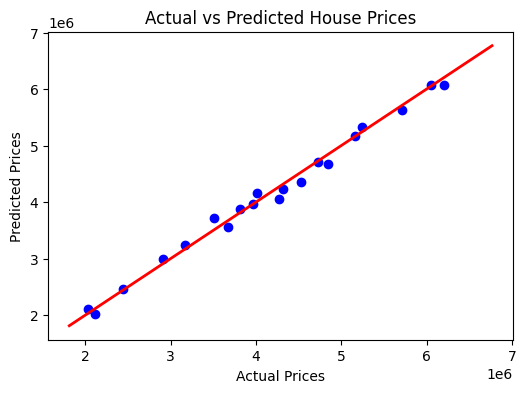

In [13]:
# Plot actual vs predicted
plt.figure(figsize=(6,4))
plt.scatter(y_test, y_pred, color='blue')
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red', linewidth=2)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted House Prices")
plt.show()


In [14]:
# Step 11: Predict a new house
new_data = pd.DataFrame({
    'Area': [3000],
    'Bedrooms': [4],
    'Bathrooms': [3],
    'Stories': [2],
    'Parking': [2]
})

predicted_price = model.predict(new_data)
print("Predicted Price for New House:", predicted_price[0])


Predicted Price for New House: 5057912.221660329


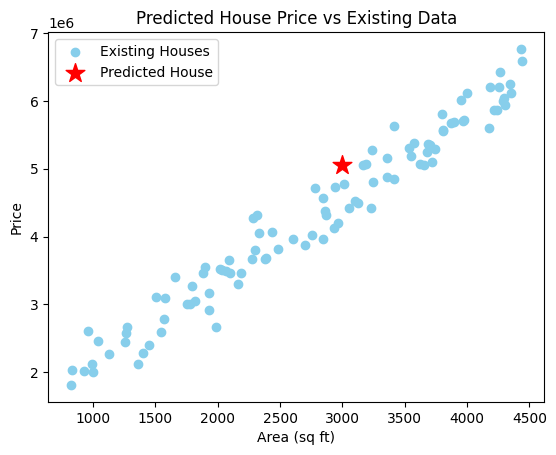

In [16]:
# Scatter plot of existing data
plt.scatter(df['Area'], df['Price'], color='skyblue', label='Existing Houses')

# Predicted new house point
plt.scatter(new_data['Area'], predicted_price, color='red', marker='*', s=200, label='Predicted House')

# Labels and title
plt.xlabel("Area (sq ft)")
plt.ylabel("Price")
plt.title("Predicted House Price vs Existing Data")

# Show legend
plt.legend()

# Display
plt.show()
